In [89]:
import numpy as np
import pandas as pd

import matplotlib as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [91]:
df.describe()

,Collections
count,231.000000
mean,115.000000
std,66.828138
min,0.000000
25%,57.500000
50%,115.000000
75%,172.500000
max,230.000000


In [31]:
df['Collections'] = df['Collections'].fillna('None')

In [32]:
label_encoder = preprocessing.LabelEncoder()
df['Collections'] = label_encoder.fit_transform(df['Collections'])
df.head()

,Collections,Sales,Buyers,Txns,Owners
0,19,"$4,090,222,023","1,790,587","17,670,824","2,130,467"
1,28,"$2,439,754,017","12,052","32,670","6,586"
2,53,"$2,388,467,992","6,076","22,269","3,804"
3,138,"$1,744,822,678","23,768","51,775","13,121"
4,16,"$1,310,734,558","33,549","184,470","36,091"


In [80]:
fp = open('nft_sales.csv')
data = []
reader = csv.reader(fp)
first = True
x = []
y = np.array([i for i in range(250)])
for line in reader: 
    if first:
        first = False
        continue
    sales = int(line[1][1:].replace(',', ''))
    x.append(sales)

x = np.array(x)
x = x.reshape(-1, 1)
y

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [81]:
model = LinearRegression()

model.fit(x, y)

LinearRegression()

In [82]:
# Print the coefficients (slope and intercept)
print('Slope:', model.coef_[0])
print('Intercept:', model.intercept_)

Slope: -8.02200800823836e-08
Intercept: 135.2609007385076


In [84]:
y_pred = model.predict(x)
y_pred

array([-192.8570375 ,  -60.45636189,  -56.34219285,   -4.70891422,
         30.11366953,   50.68763469,   52.40159984,   70.93159594,
         76.24679795,   87.50818016,   92.73133869,   93.14754213,
         99.96380984,  105.45648618,  105.65876473,  107.15944505,
        112.76872666,  115.30522446,  115.52513169,  115.99949653,
        117.05747344,  117.14201987,  117.15160697,  118.89652591,
        119.17583691,  119.50270646,  119.85168362,  120.09546154,
        120.31583725,  121.1678864 ,  121.9625324 ,  122.3830232 ,
        122.40987494,  122.98514365,  123.68085133,  124.00525475,
        124.31911285,  124.46590982,  124.56560348,  124.7248312 ,
        125.161128  ,  125.20118341,  125.34184587,  125.49592482,
        125.68464536,  125.68871581,  126.04258985,  126.67763631,
        126.68108954,  126.74703149,  126.74988668,  126.91306564,
        126.94048205,  127.09920382,  127.27601345,  127.34246046,
        127.37135341,  127.38097509,  127.45727842,  127.59604

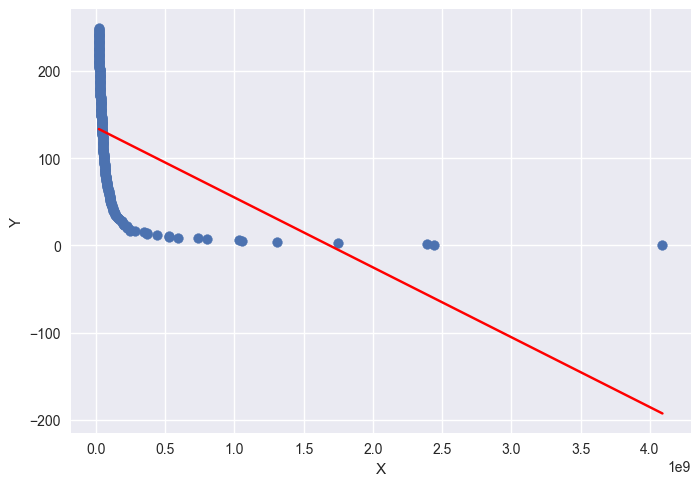

In [85]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [88]:
# Calculate R-squared score (accuracy)
r2 = r2_score(y, y_pred)
r2

0.17322858540861452